# tests reference

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if 'google.colab' in str(get_ipython()):
    repo_name = 'onset-benchmark'
    repo_path = f'/content/{repo_name}'
    
    # Check if the current working directory is already the repo
    if os.getcwd() != repo_path:
        if not os.path.exists(repo_path):
            !git clone https://github.com/inspektral/onset-benchmark.git
        os.chdir(repo_path)  # Change to the repository directory
        !pip install -r requirements.txt  # Install dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils

2025-07-08 13:46:50.856611: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-08 13:46:50.864035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-08 13:46:50.874338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-08 13:46:50.876829: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-08 13:46:50.885654: I tensorflow/core/platform/cpu_feature_guar

In [3]:
SAMPLE_RATE = 44100

Tests
0: square_slow

    Square slow attack: 4 2.5s 440hz square wave long notes, triangular envelope
    


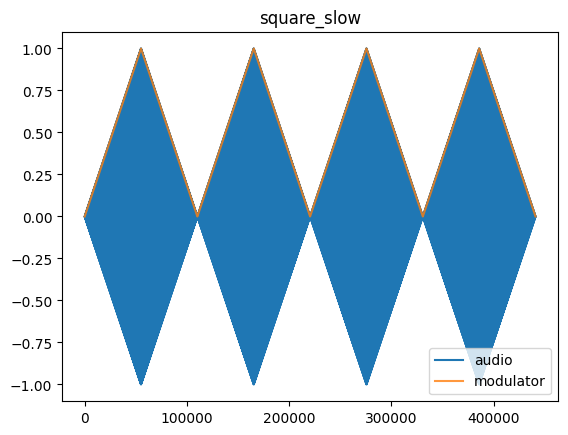

1: square_fast

    Square short: short burst (1200 samples) 44hz square wave, exponential envelope
    


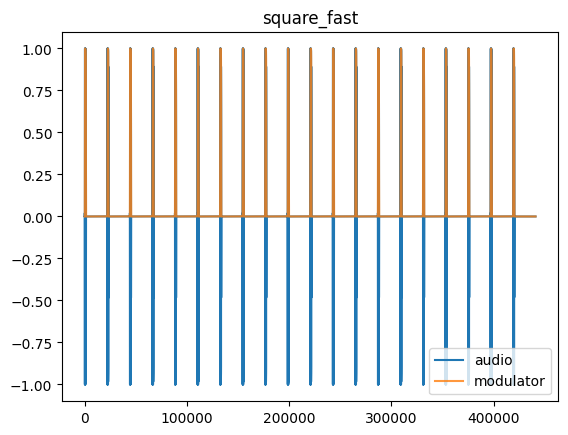

2: square_vibrato

    Square vibrato: continuous square wave oscillating between 330 and 550, vibrato starts at 0.2hz and rises to 1hz
    


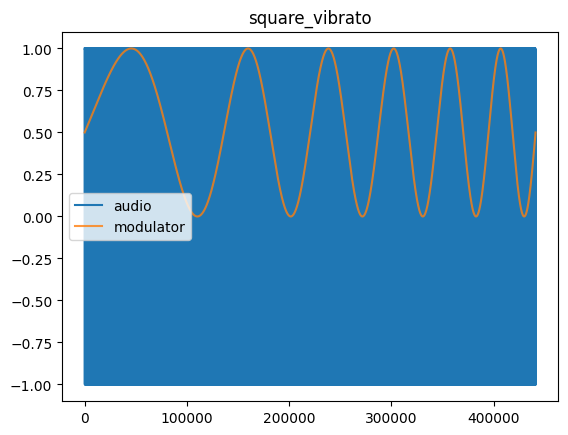

3: saw_noise

    Sawtooth over noise: 4 1.5s long 50hz sawtooth notes, with fast attack and slow decay, over white noise with half the amplitude (-6db) with respect to the sawtooth 
    


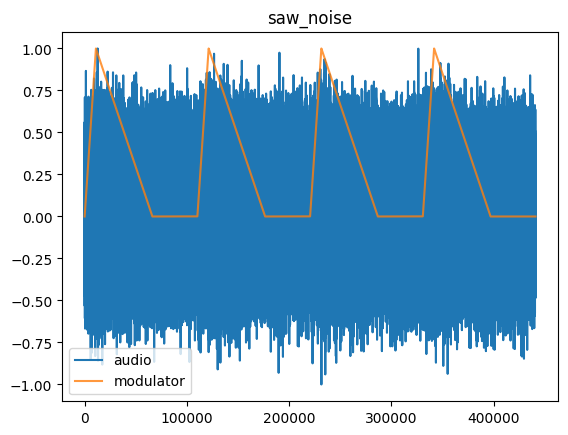

4: sines_noise

    Sines over noise: 4 1.5s long notes made of 11 stacked sines each one with a stable random frequency between 100hz and 5000hz, with fast attack and slow decay, over white noise with half the amplitude (-6db) with respect to the sawtooth 
    


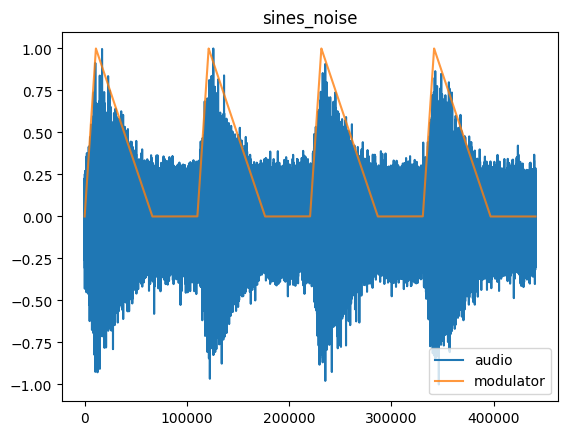

5: filter_saw

    Filtered saw: stable 100hz saw with 12db/oct lowpass filter with cutoff frequency between 700hz and 1300hz, modulated by 1hz sine wave
    


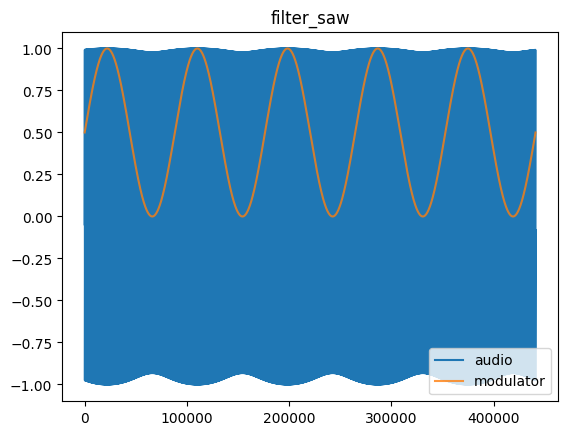

6: triangle_clip

    Soft clipped triangle: stable 440hz trainge wave into a soft clipper with gain between 0db and 20db, modulated by a sine wave that starts at 0.2hz and ends at 1hz
    


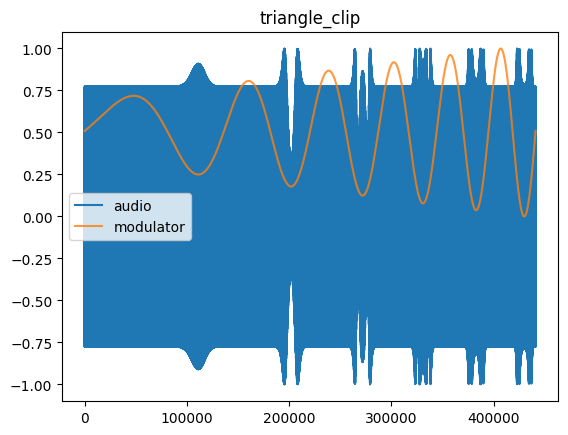

7: fm_amplitude

    FM triangle (modulator amplitude): stable 440hz triangle wave with modulated by 600hz triangle wave  whose amplitude is modulated between 0 and 0.5 by a sine wave that starts at 0.2hz and ends at 1hz
    


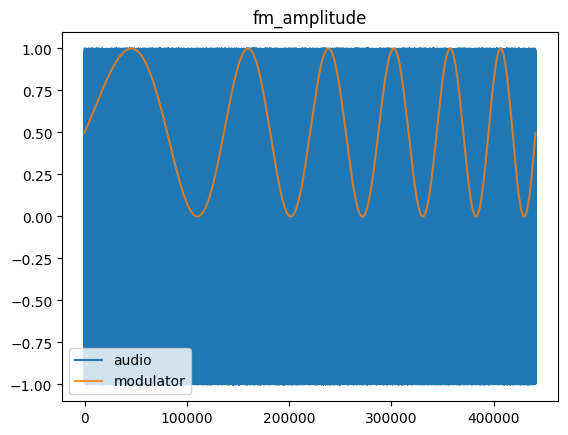

8: fm_frequency

    FM triangle (modulator frequency): stable 440hz triangle wave with modulated by 400-600hz (modulated by a sine wave that starts at 0.2hz and ends at 1hz) triangle wave with amplitude 0.5.
    


In [ ]:
import test_signals

tests = {}

for name, obj in vars(test_signals).items():
    if callable(obj):
        tests[name] = obj

print("Tests")
for i, name in enumerate(tests.keys()):
    print(f"{i}: {name}")
    print(tests[name].__doc__)


    audio, modulator = tests[name]()

    plt.plot(audio, label='audio')
    modulator = utils.norm(synth.stretch_array(modulator, len(audio)))
    plt.plot(modulator, alpha=0.8, label='modulator')
    plt.title(name)
    plt.legend()

    plt.show()

    display(Audio(audio, rate=SAMPLE_RATE))